In [79]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [80]:
num_frames = 100
timestep = 0.05
# t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
t_vals = np.linspace(0.0, (num_frames)*timestep, num_frames+1)
t_vals = t_vals[1:]

# s_vals = np.linspace(0.2, 20.0, 1001)
s_vals = np.linspace(0.2, 3.0, 101)
s_vals = s_vals[:-1]
# s_vals = np.linspace(0, 100, 101)
# s_vals[0] = 1e-10
# s_vals = s_vals[:-1]
# print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

# # get the range of k values
# k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = fft.fftshift(k_vals)
# # k_vals = 2 * np.pi * k_vals
# # print(k_vals)
# print(f"shape of k_vals : {k_vals.shape}")

In [81]:
dk = 1/(r_vals[-1]-r_vals[0])
# we need only the positive k values
k_vals = np.linspace(0.0, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi*dk, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi/dk, np.pi/dk, r_vals.shape[0])
# print(k_vals)
print(k_vals.shape)

(500,)


In [82]:
alpha0 = 0.5
d0 = 2.0

In [83]:
u_test = np.zeros((s_vals.shape[0], k_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(k_vals.shape[0]):
        u_test[i, j] = s_vals[i]**(alpha0-1) / (s_vals[i]**(alpha0) + d0*k_vals[j]**2)
# print(u_test)

u_test = u_test / np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)


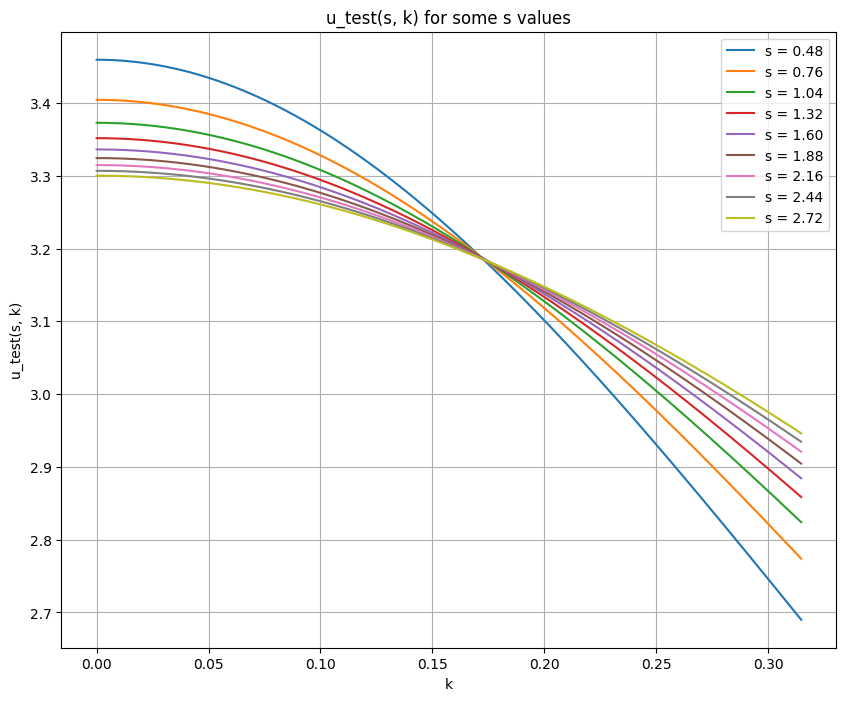

In [84]:
# plot u_test
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_test(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_test(s, k)")
plt.grid()
# plt.ylim(0)
for i in range(0, s_vals.shape[0], s_vals.shape[0]//10):
    if i == 0:
        continue
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

$u(s, k) = \frac{s^{\alpha-1}}{s^{\alpha}+Dk^2}$

In [85]:
# load u.txt and compare with u_test
u = np.loadtxt("u.txt")
print(u.shape)

(100, 500)


average difference for s = 0.26 : 0.04092229900213694


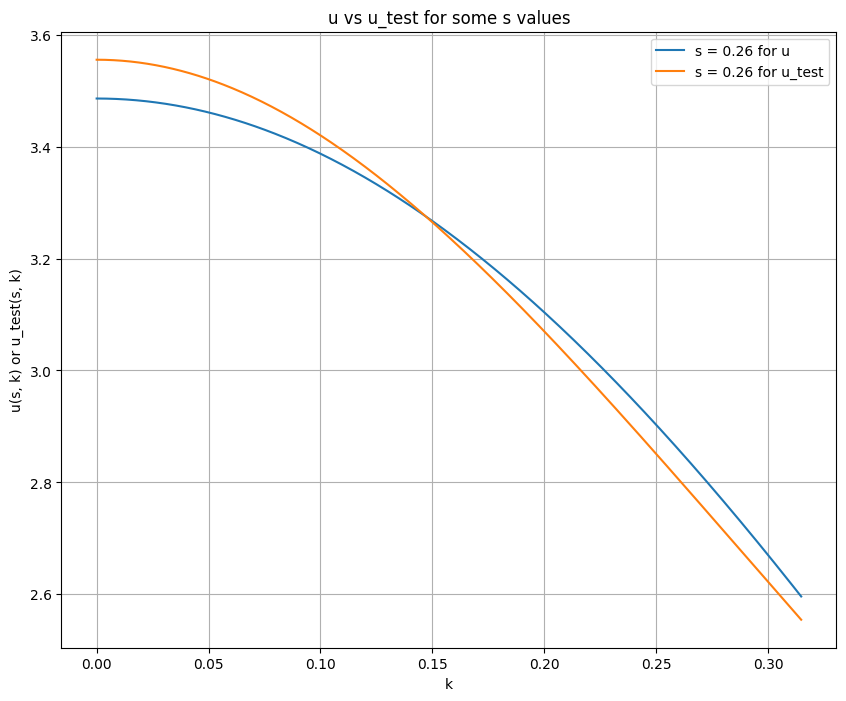

average difference for s = 0.31 : 0.02501942994467935


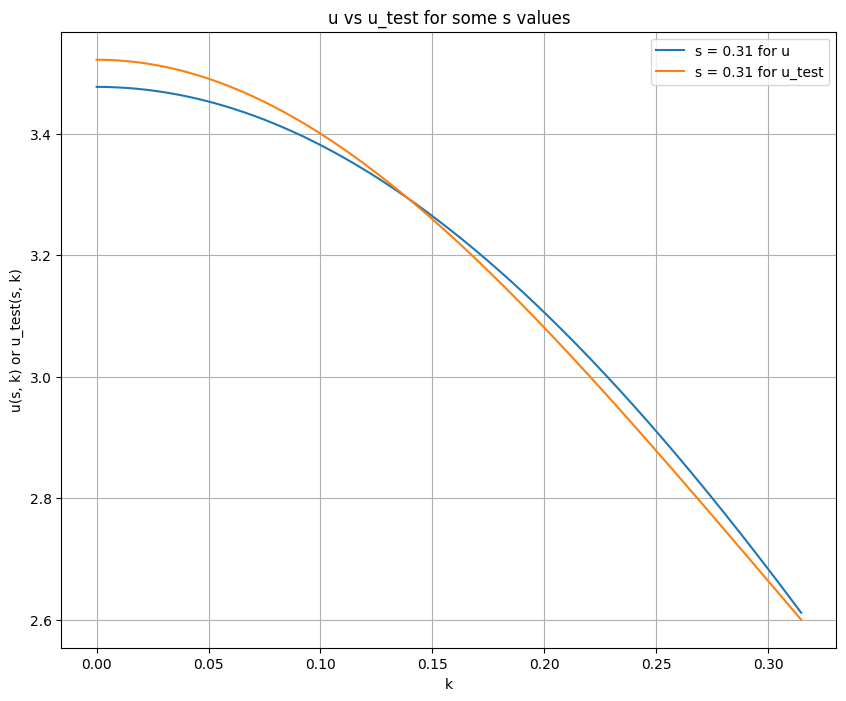

average difference for s = 0.37 : 0.014592780315012011


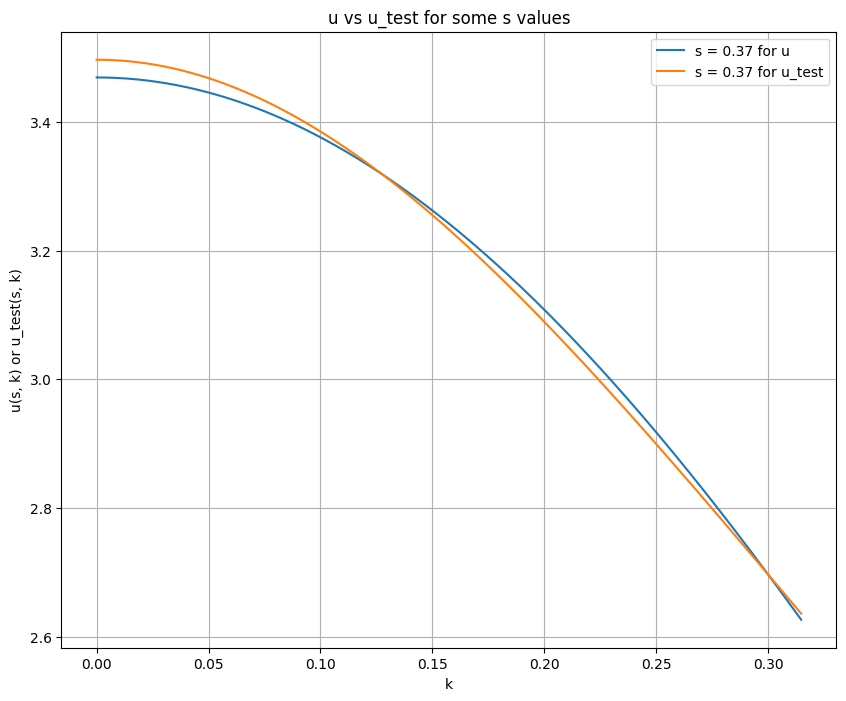

average difference for s = 0.42 : 0.009664885737371825


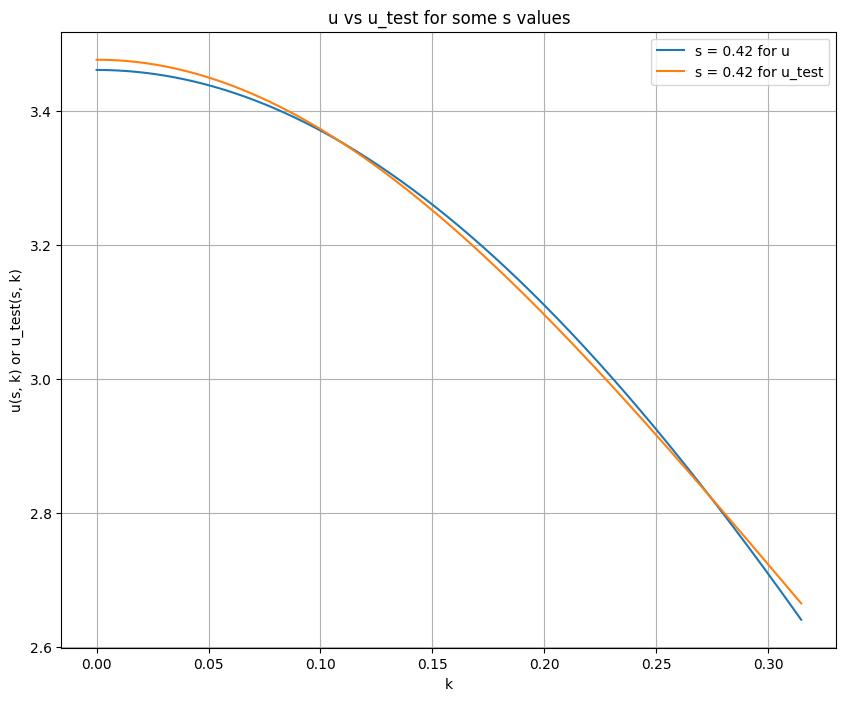

average difference for s = 0.48 : 0.008025388202477274


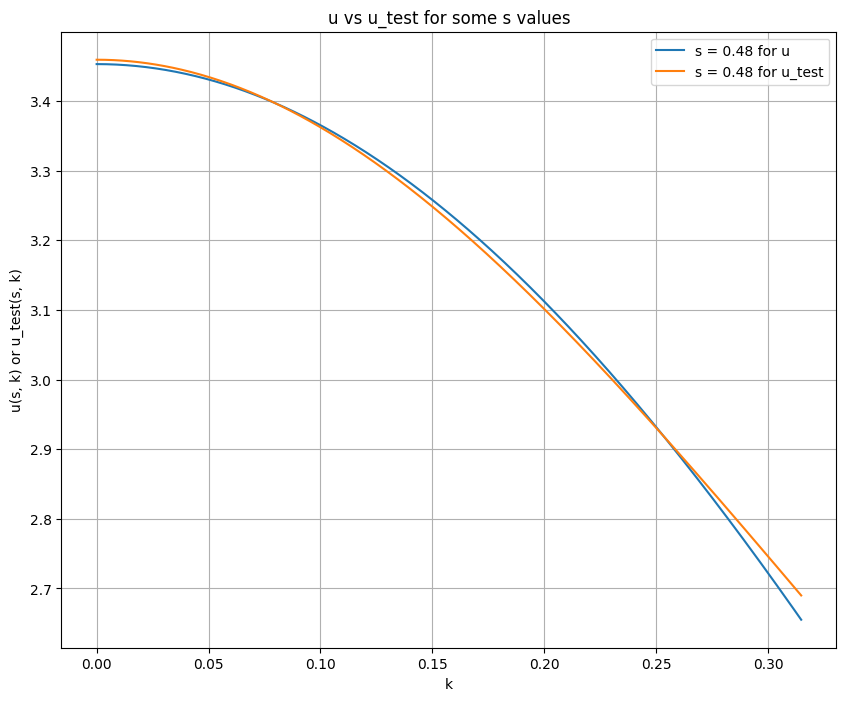

average difference for s = 0.54 : 0.008770718344302425


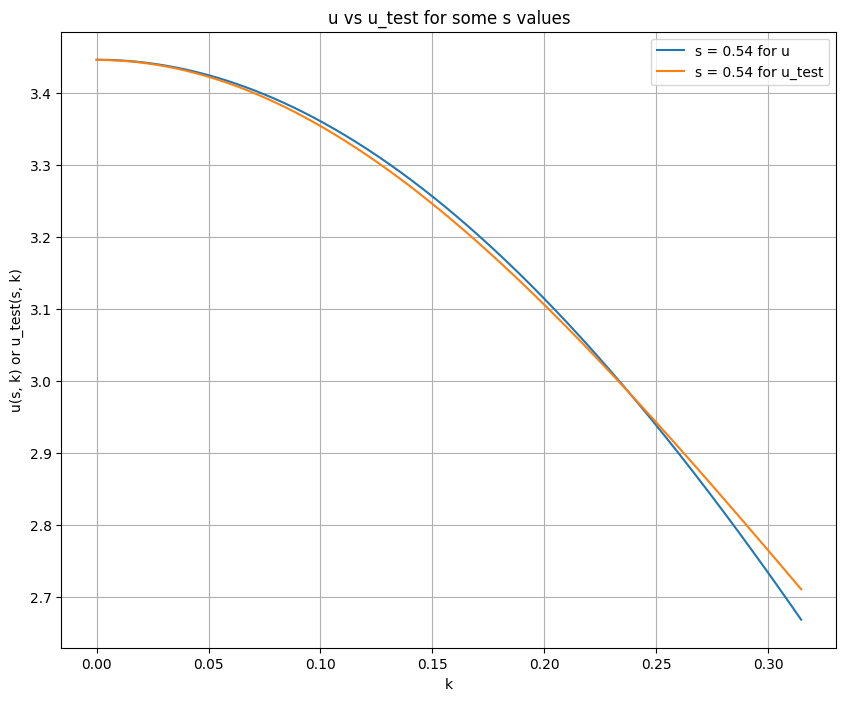

average difference for s = 0.59 : 0.011060354420027011


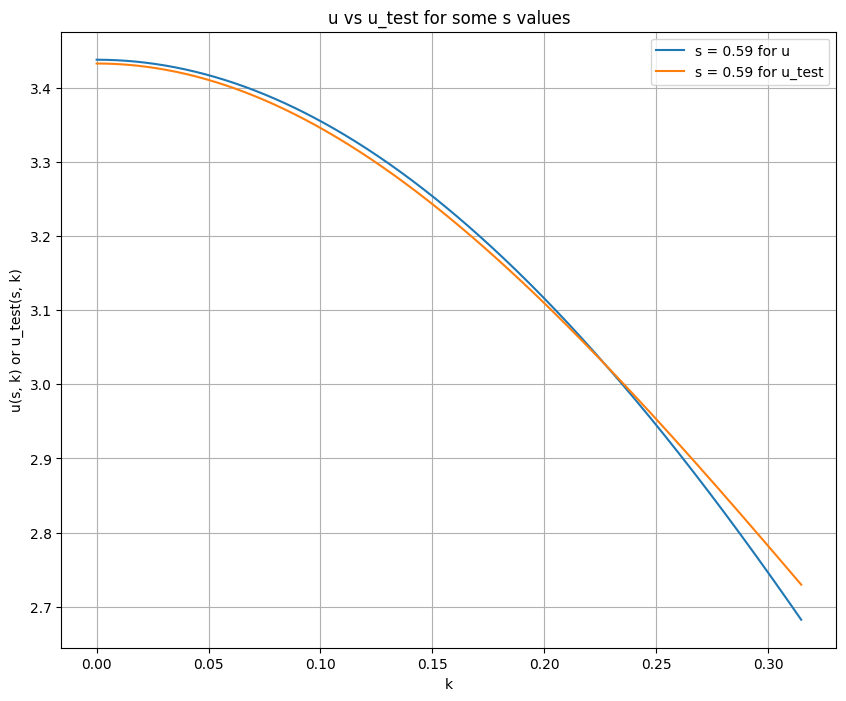

average difference for s = 0.65 : 0.012802814014191043


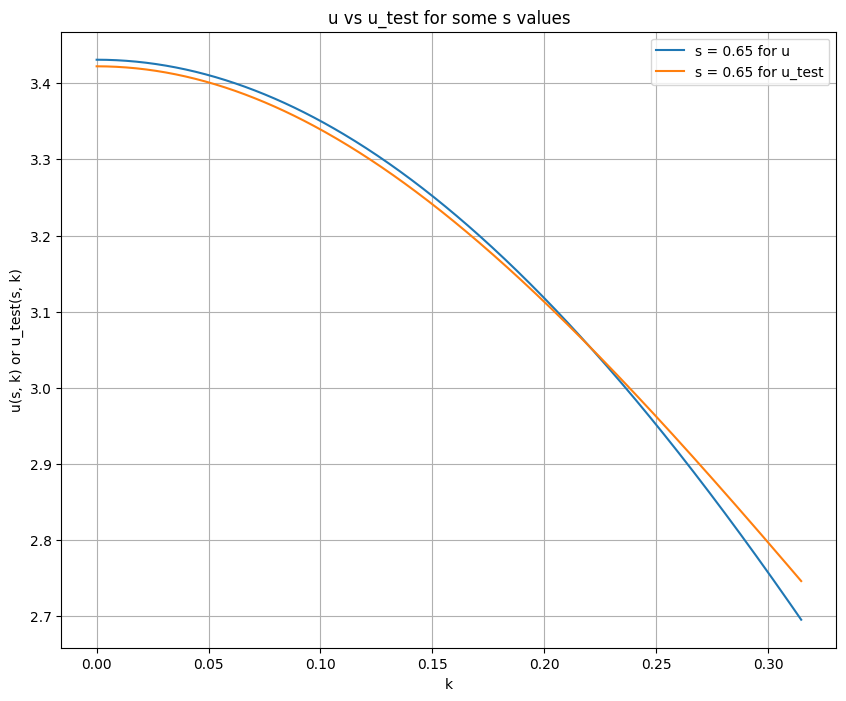

average difference for s = 0.70 : 0.014067144982174547


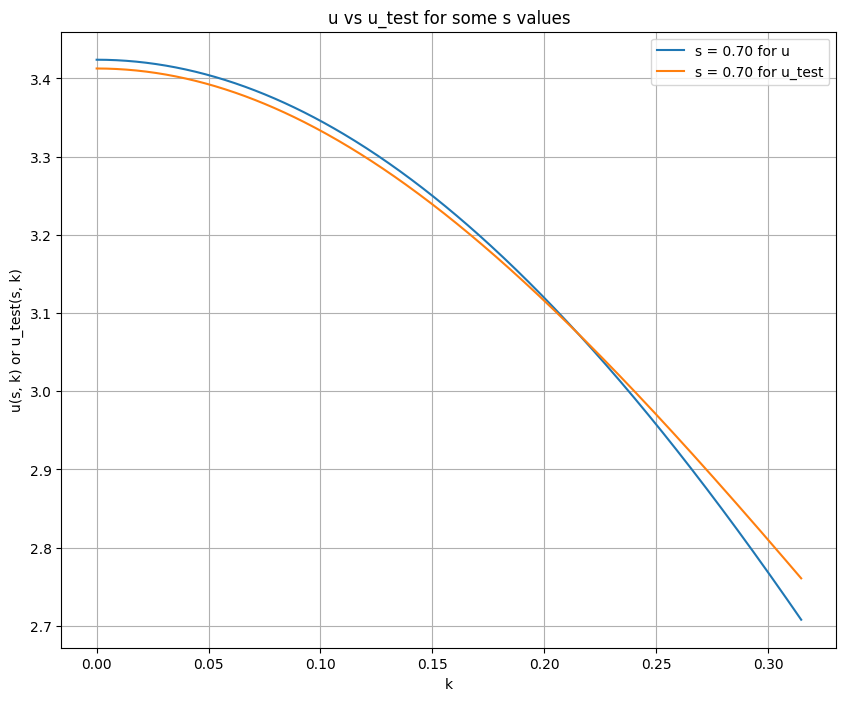

average difference for s = 0.76 : 0.014942390904148064


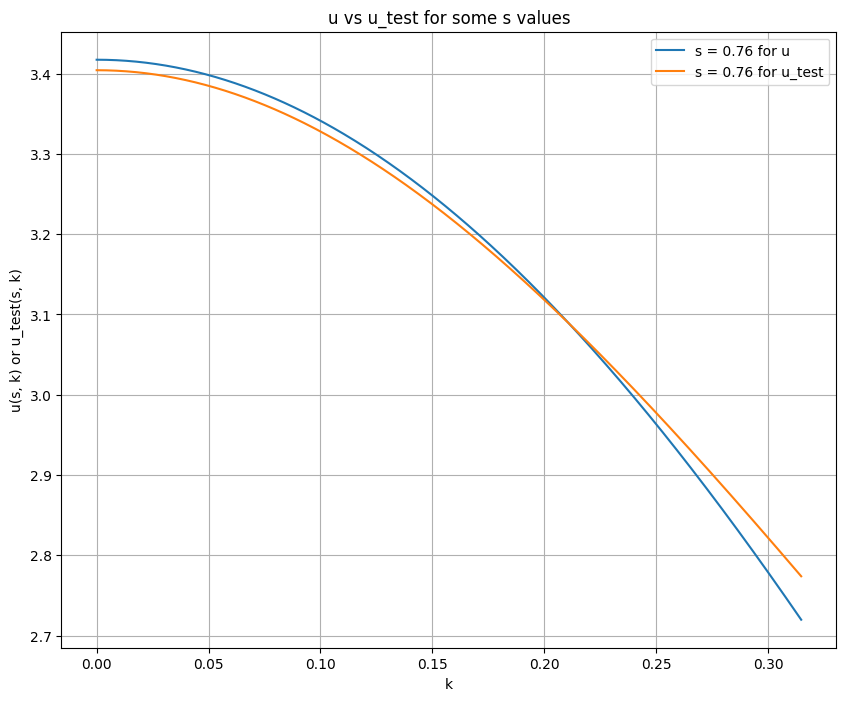

average difference for s = 0.82 : 0.015512219708767117


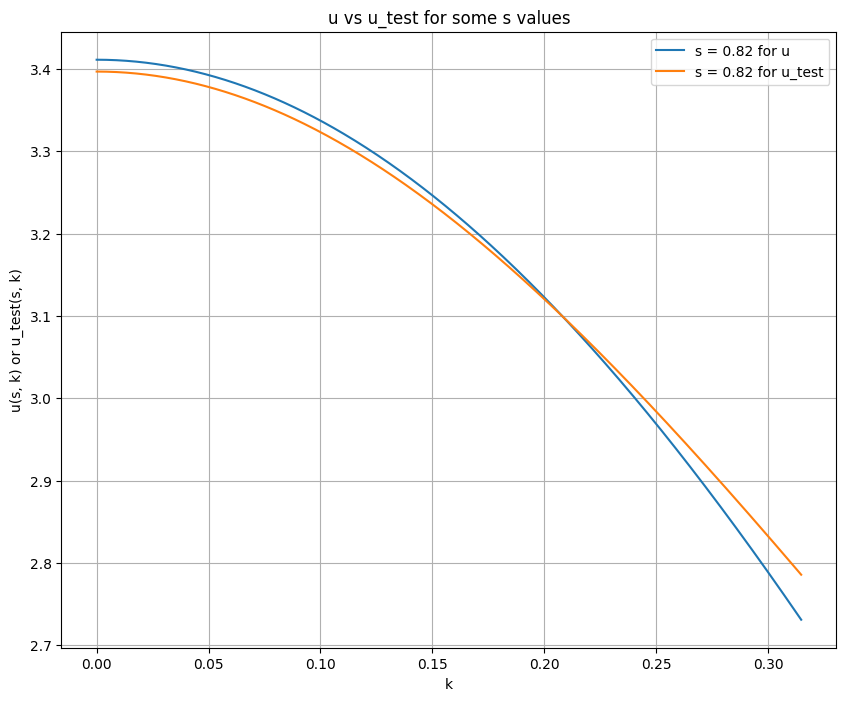

average difference for s = 0.87 : 0.015847811421901673


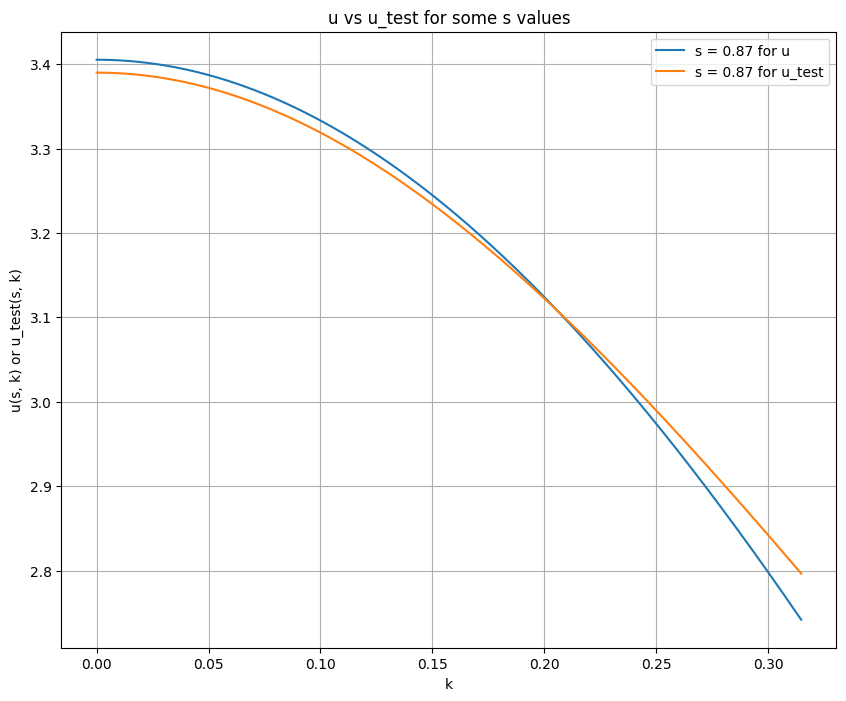

average difference for s = 0.93 : 0.016006547395429244


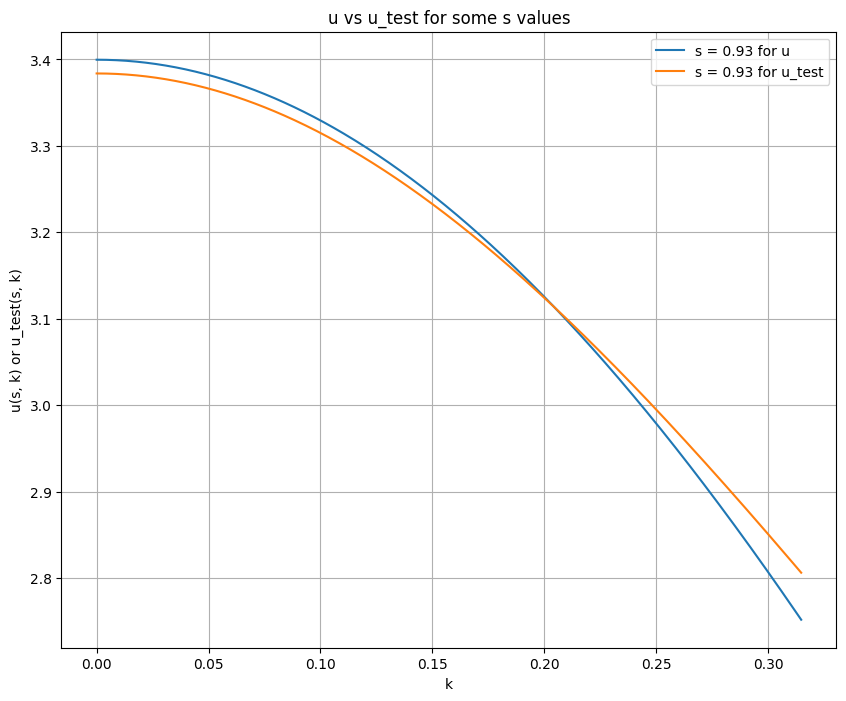

average difference for s = 0.98 : 0.016034167877465456


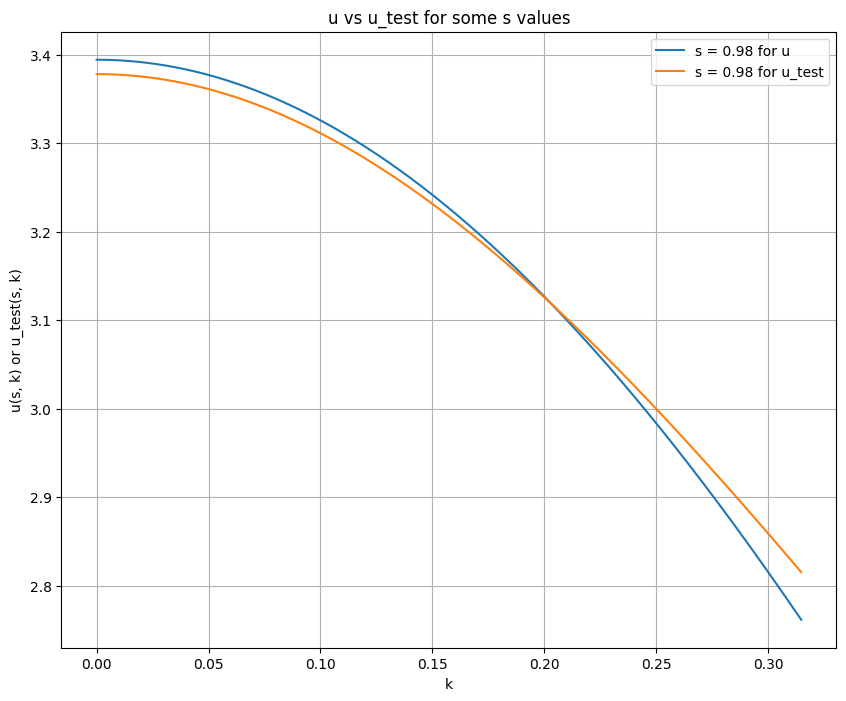

average difference for s = 1.04 : 0.015966377334907376


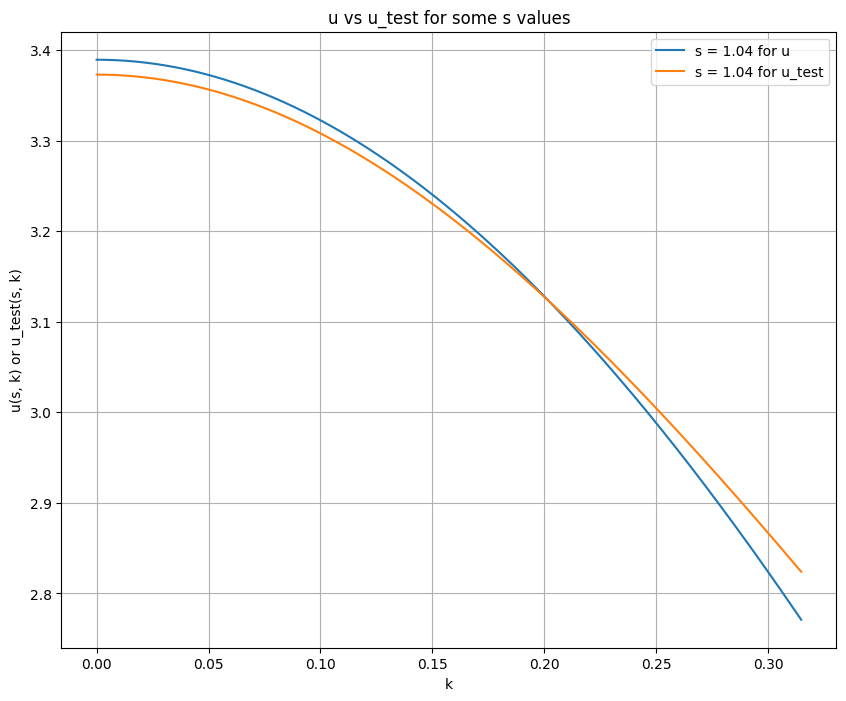

average difference for s = 1.10 : 0.015830690071190912


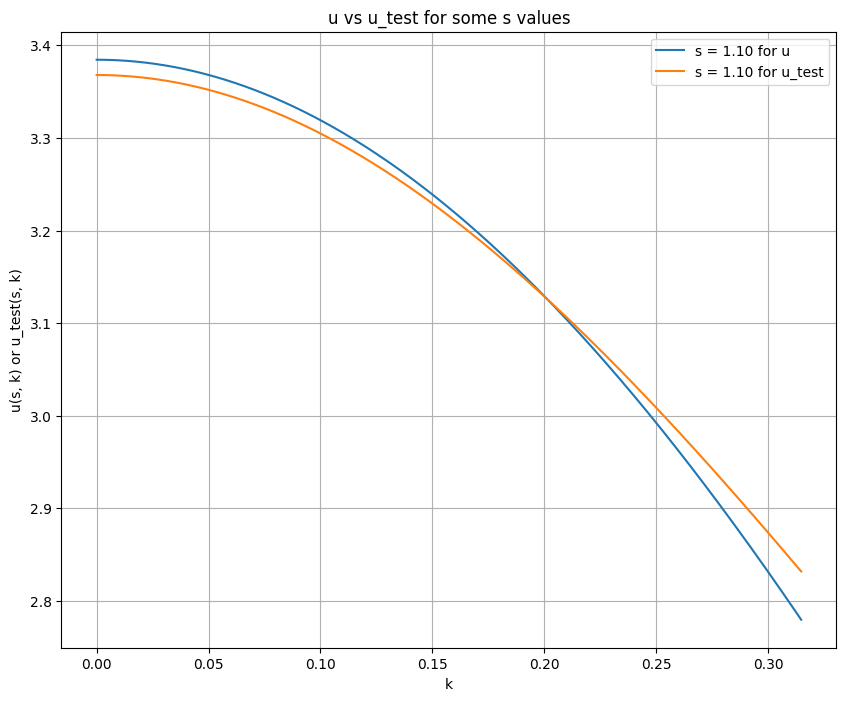

average difference for s = 1.15 : 0.01564833767997193


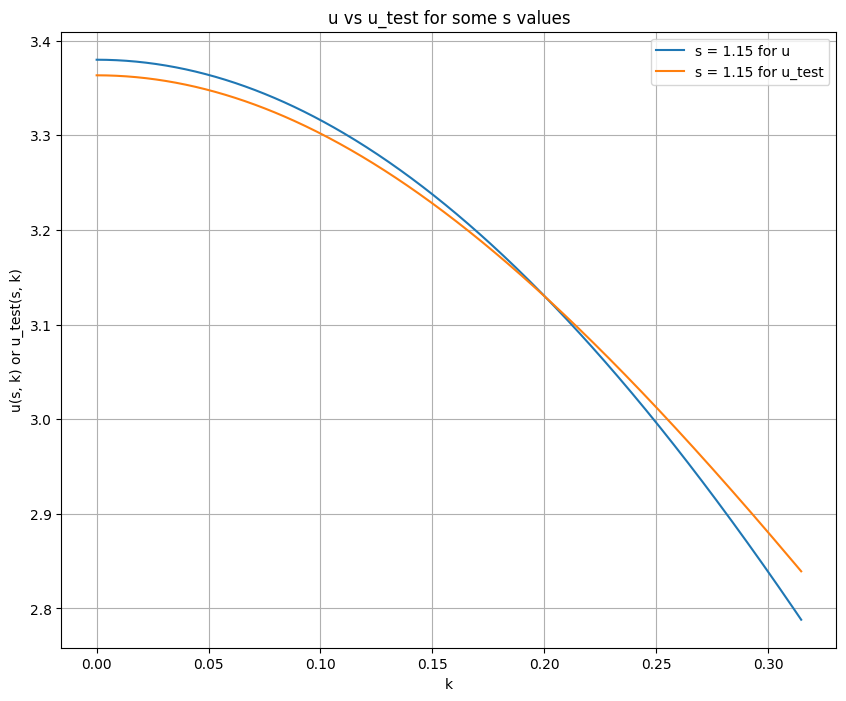

average difference for s = 1.21 : 0.015435436268680741


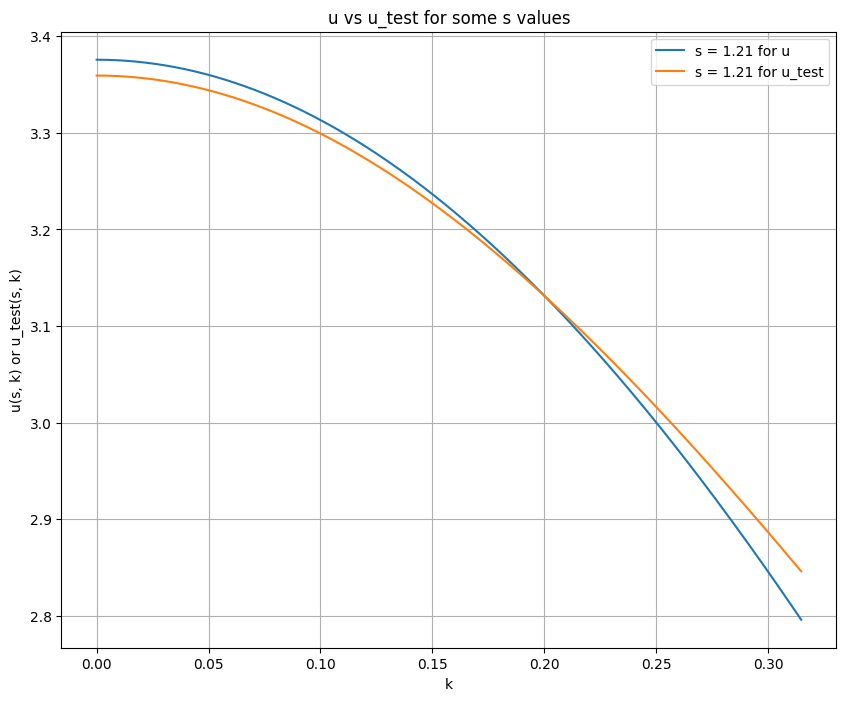

average difference for s = 1.26 : 0.015204066006118296


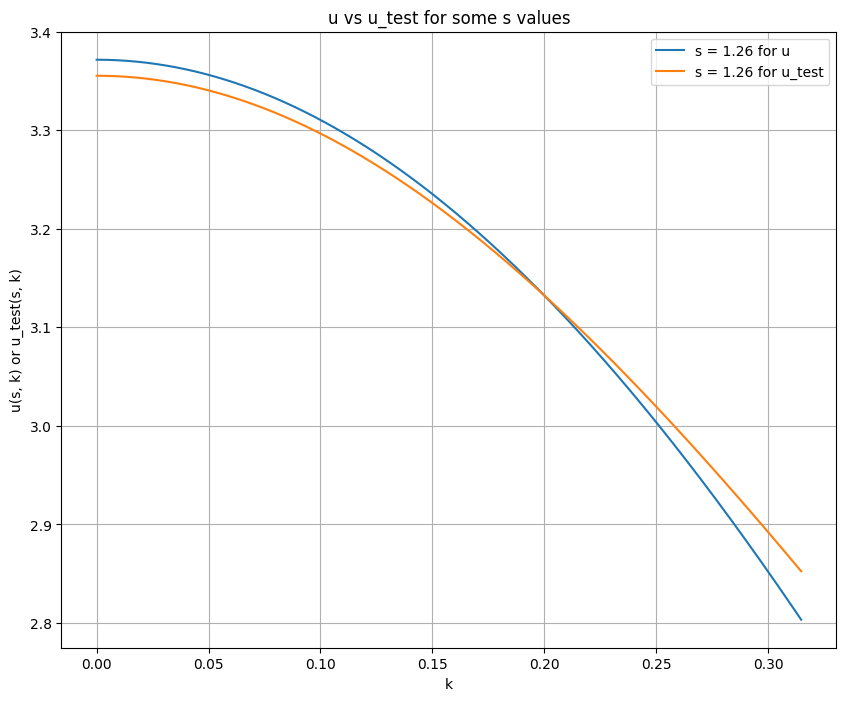

average difference for s = 1.32 : 0.014963194774707521


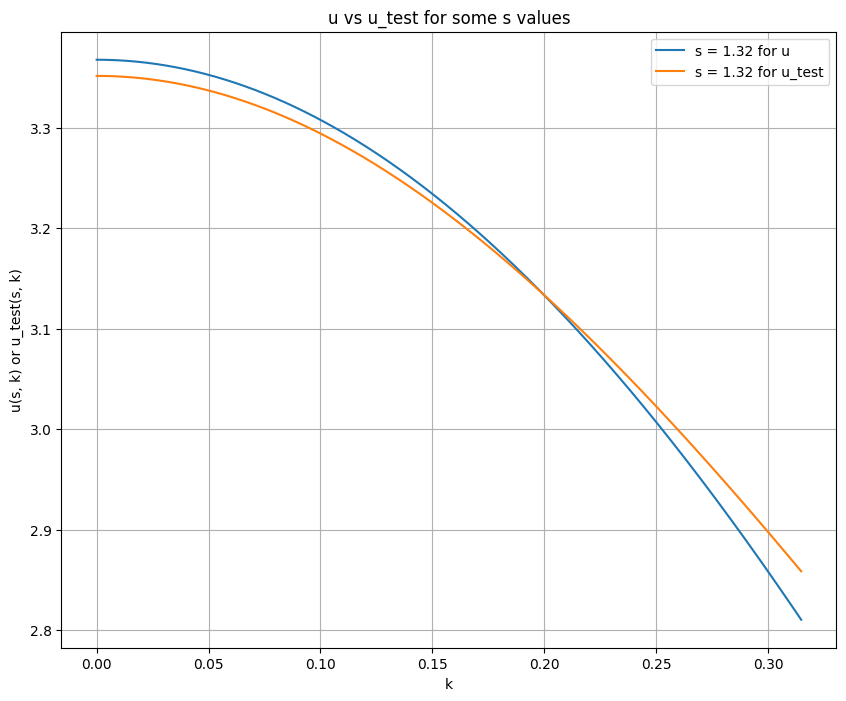

average difference for s = 1.38 : 0.014719518073916827


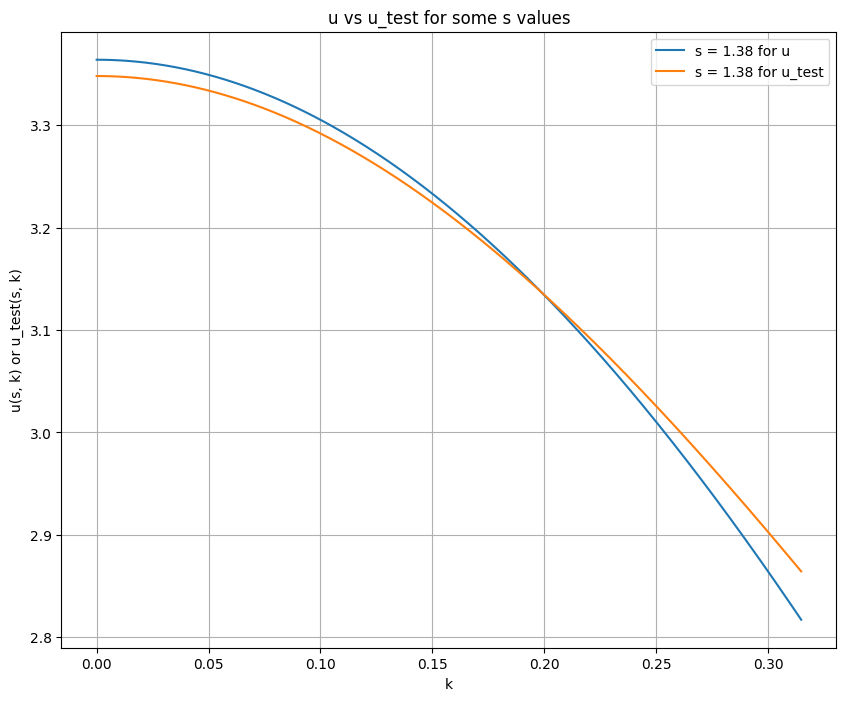

average difference for s = 1.43 : 0.014477798129140173


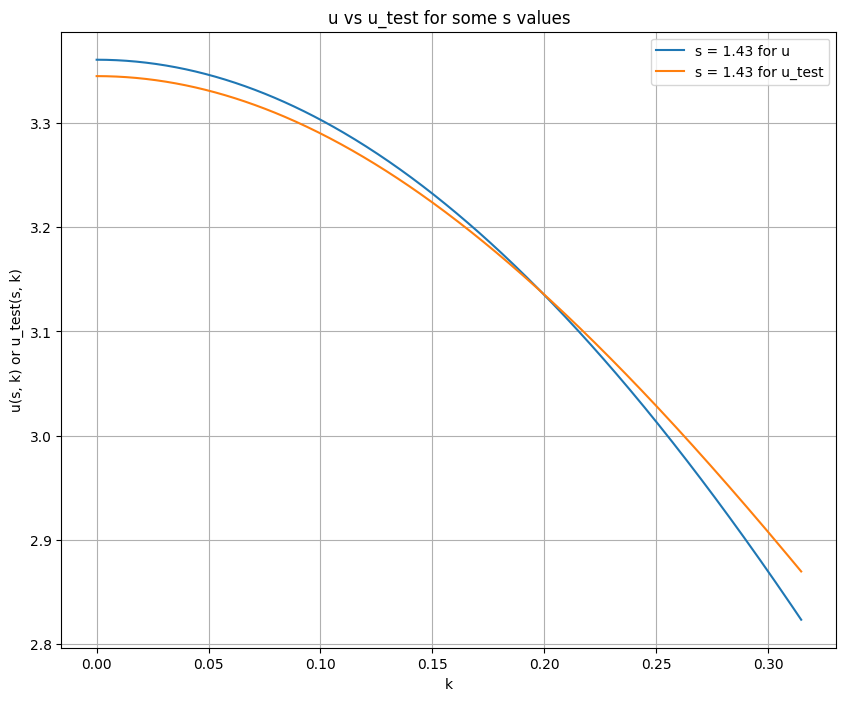

average difference for s = 1.49 : 0.014241353696615213


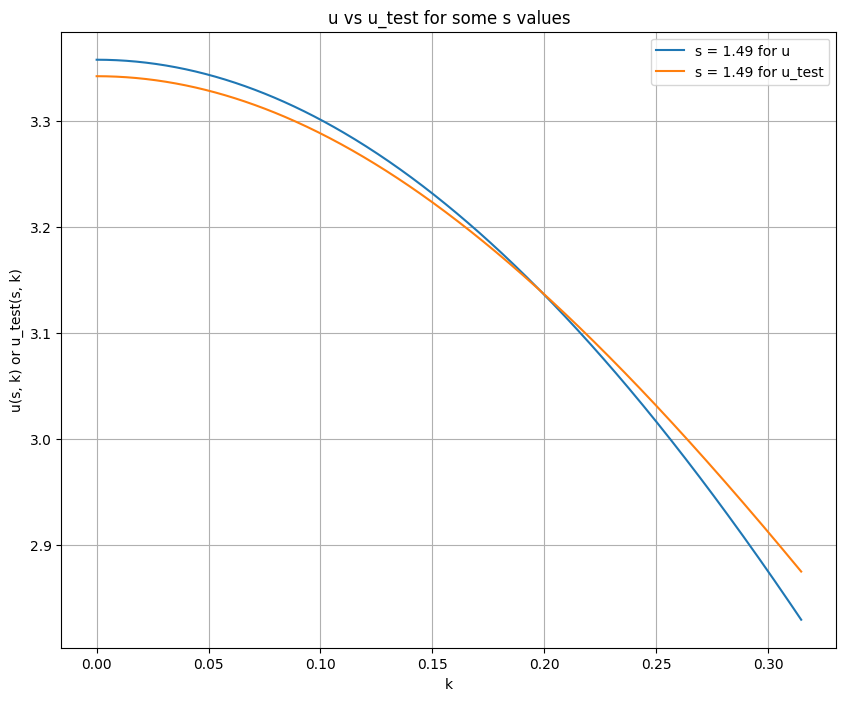

average difference for s = 1.54 : 0.014012567146084672


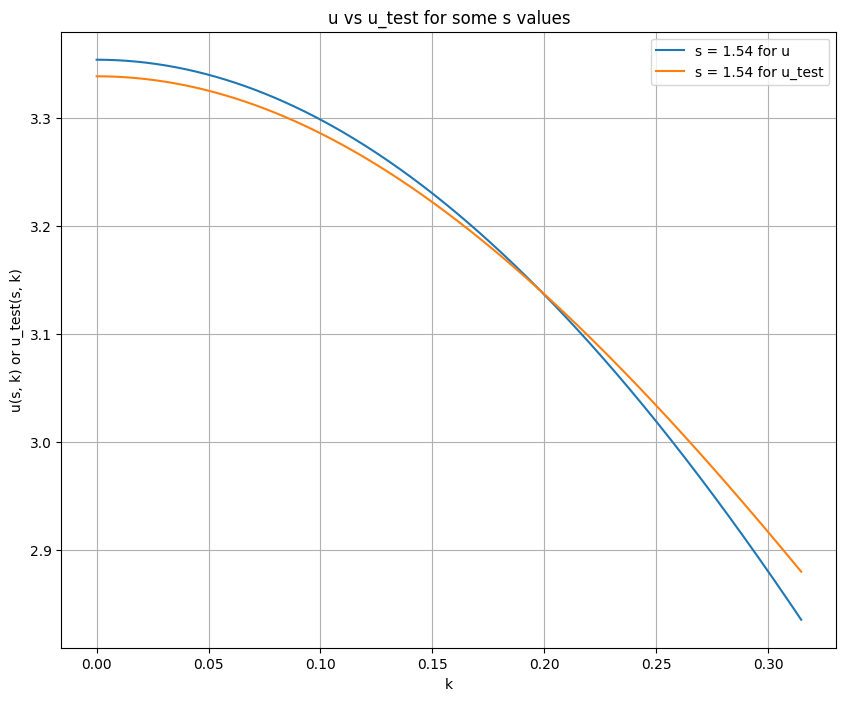

average difference for s = 1.60 : 0.013792889448206697


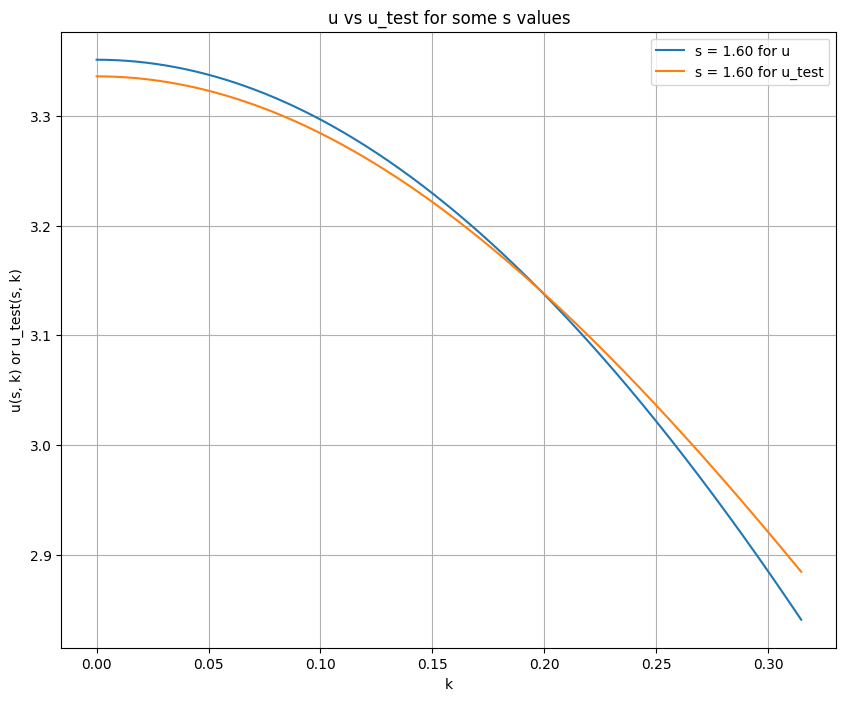

average difference for s = 1.66 : 0.013583208768547976


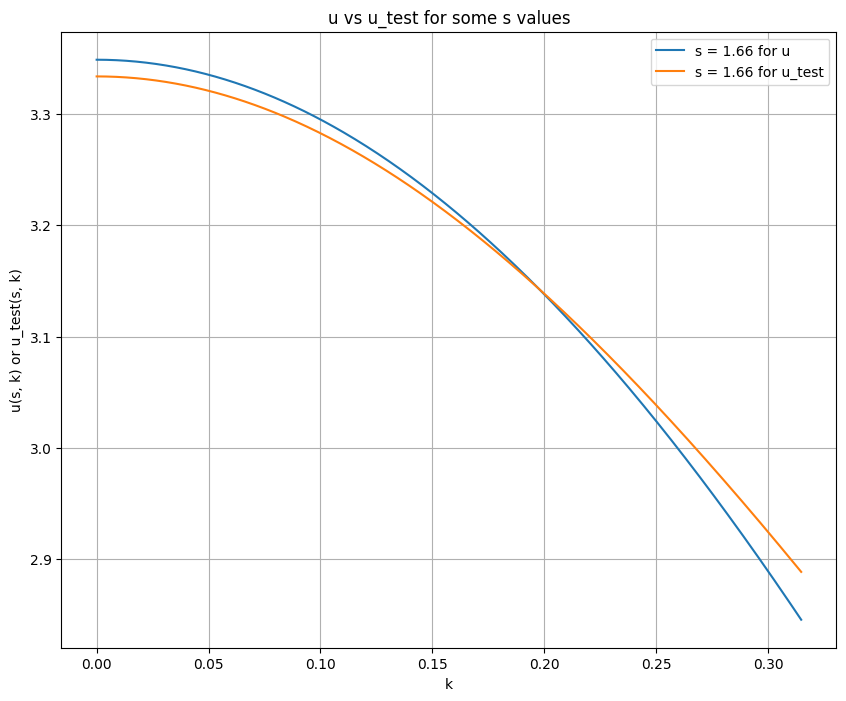

average difference for s = 1.71 : 0.013384090785150795


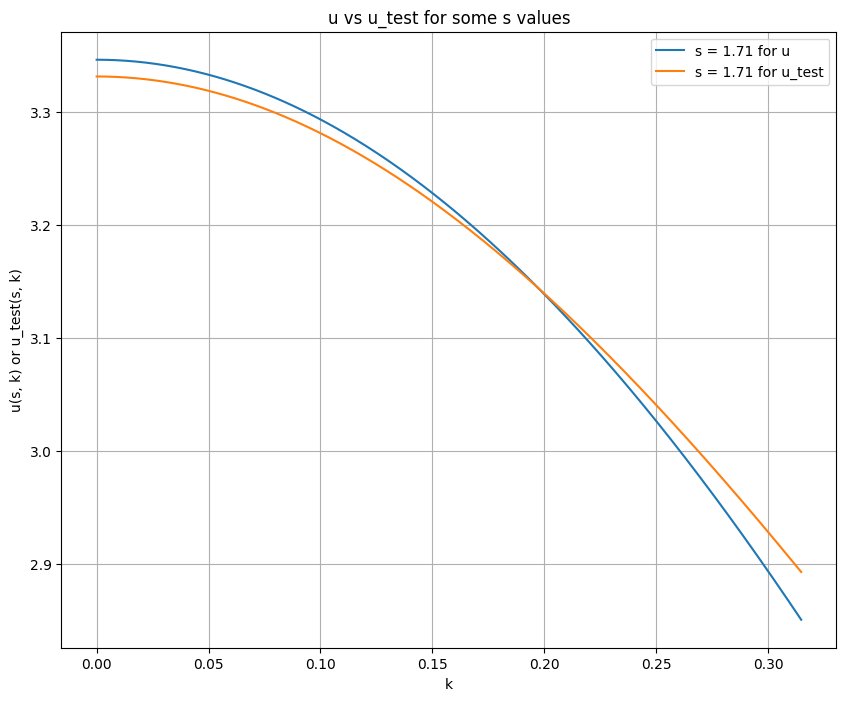

average difference for s = 1.77 : 0.013195535094198282


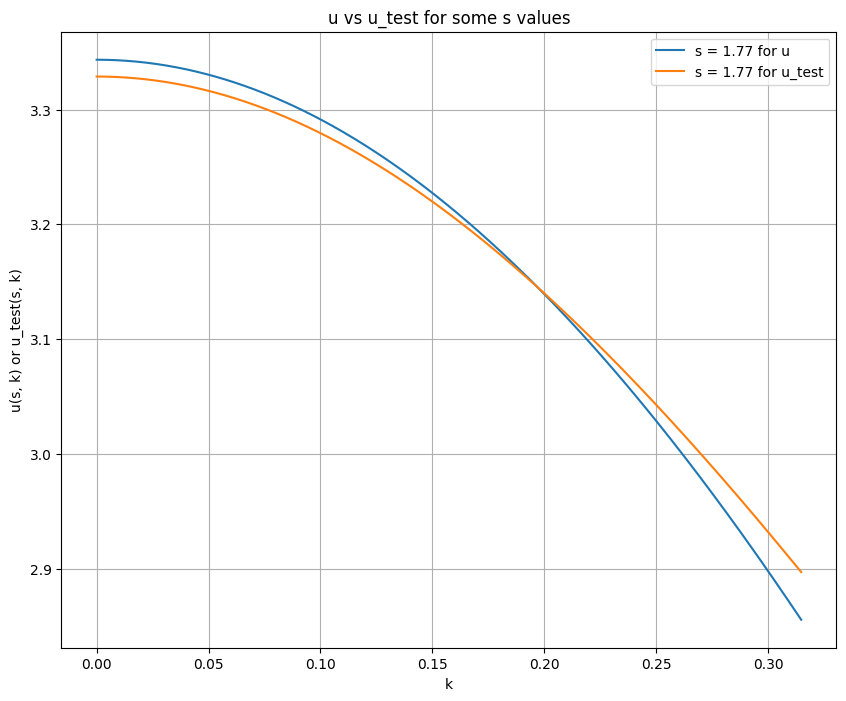

average difference for s = 1.82 : 0.01301757944056364


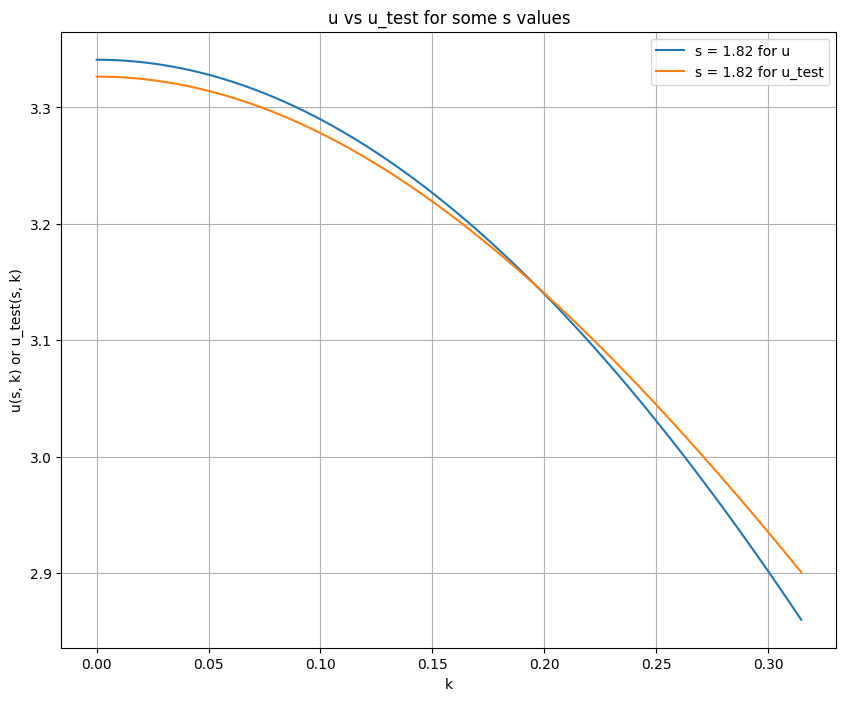

average difference for s = 1.88 : 0.012849937196611594


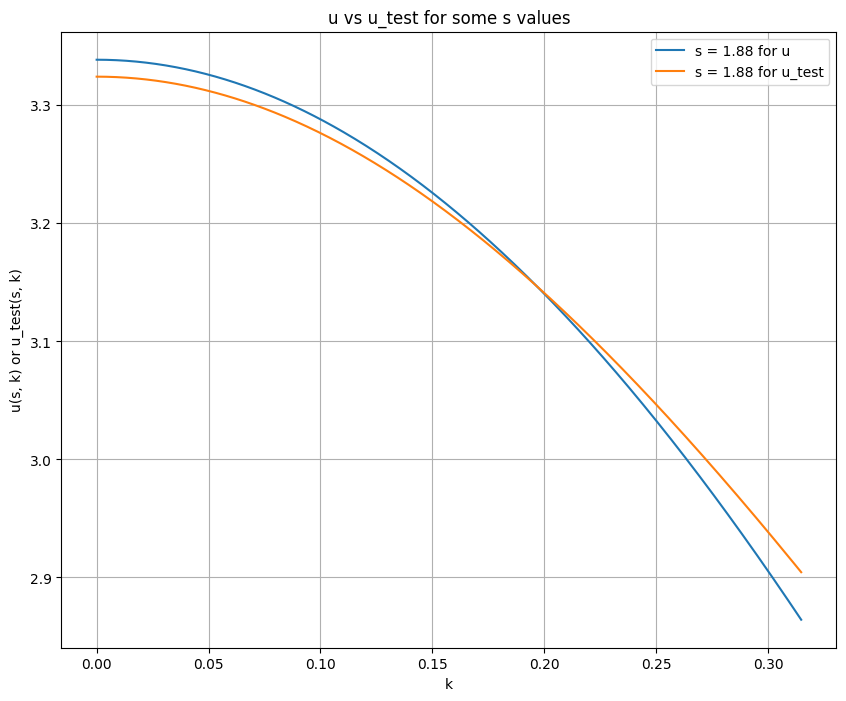

average difference for s = 1.94 : 0.01269219483954998


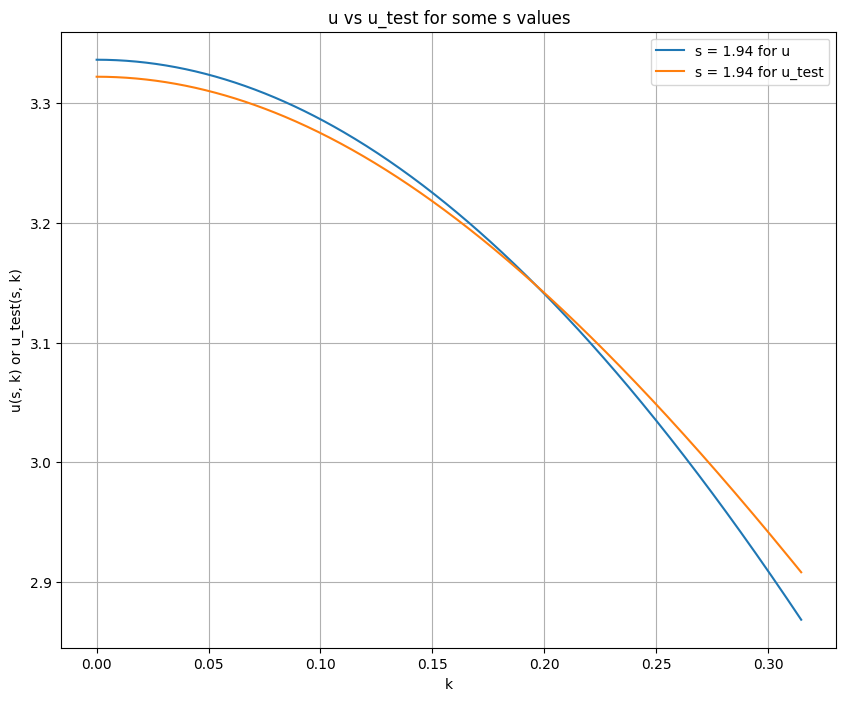

average difference for s = 1.99 : 0.012544055204537096


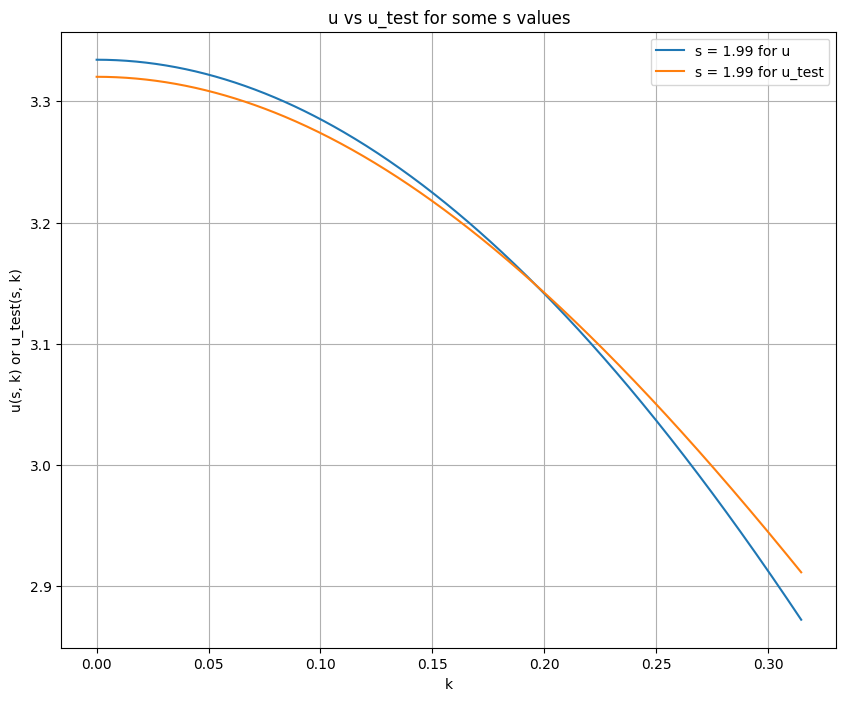

average difference for s = 2.05 : 0.012404987651581961


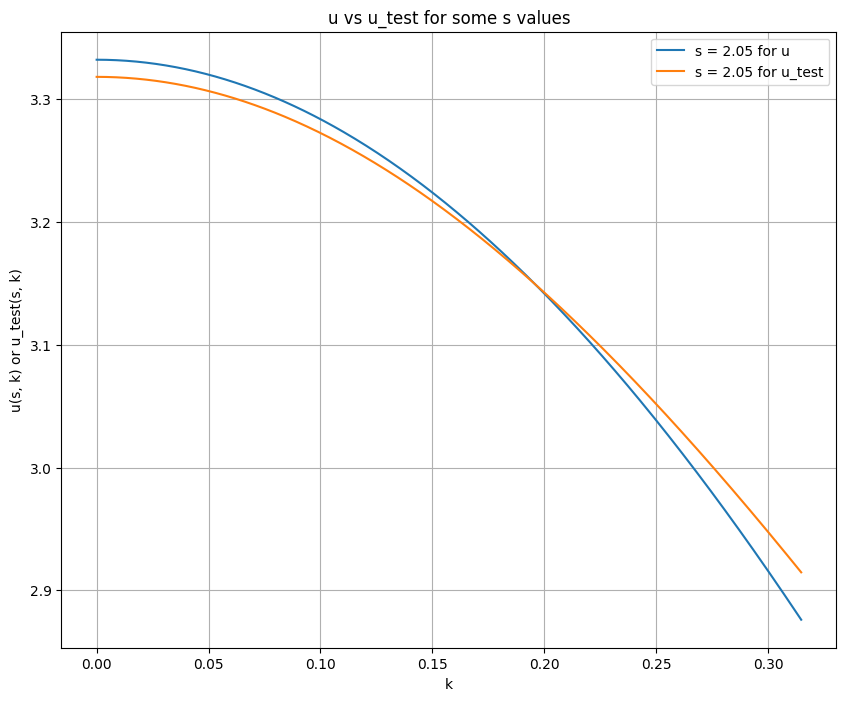

average difference for s = 2.10 : 0.012274474095039761


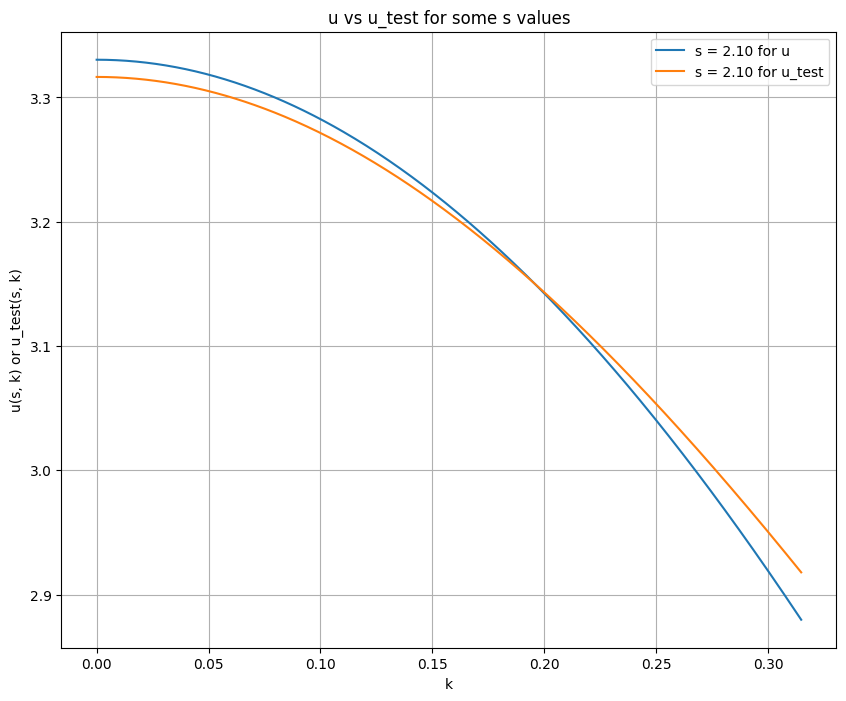

average difference for s = 2.16 : 0.012152129990580282


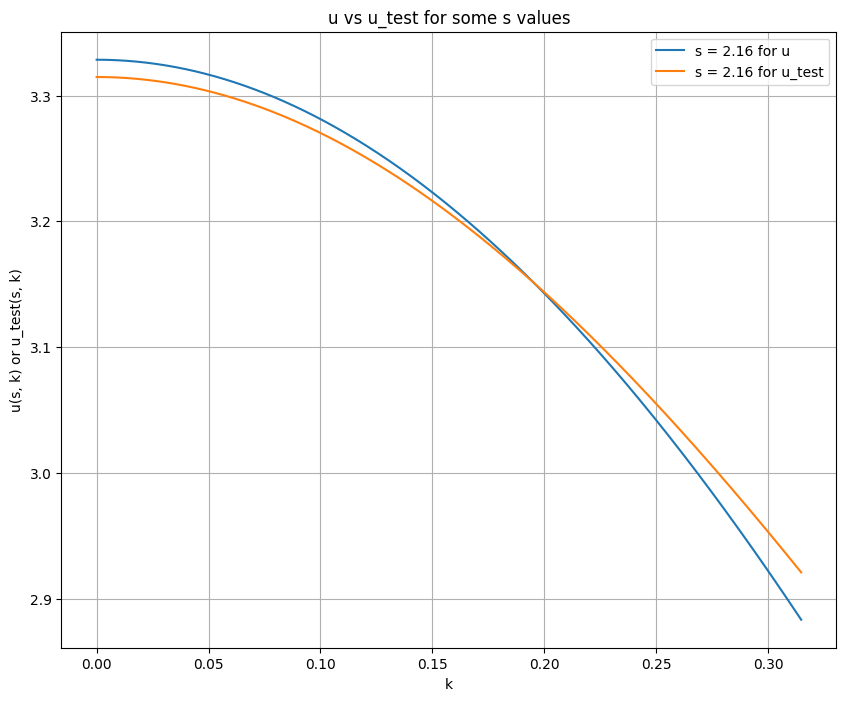

average difference for s = 2.22 : 0.012037441350544548


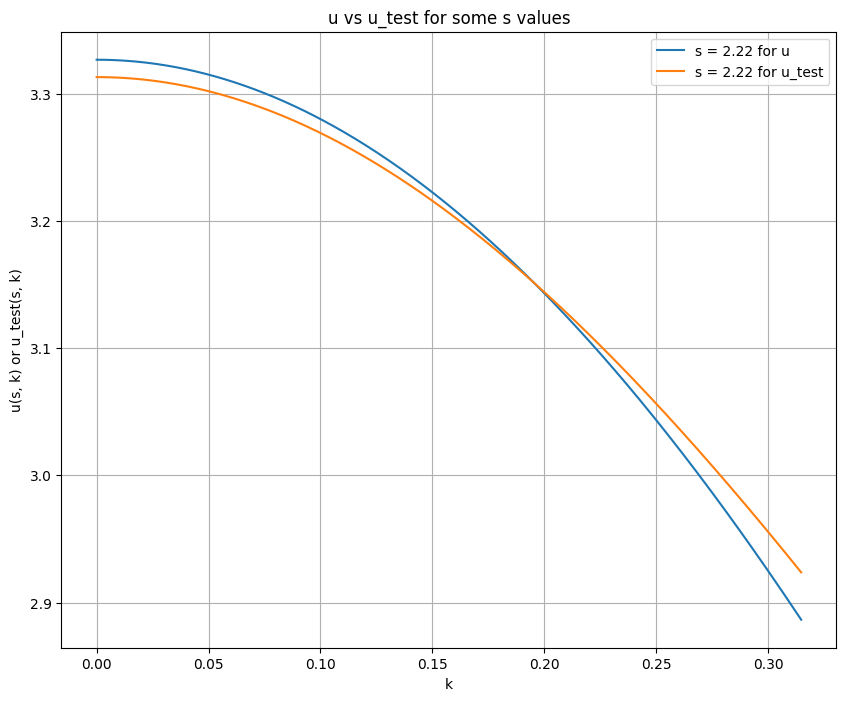

average difference for s = 2.27 : 0.011929896335081736


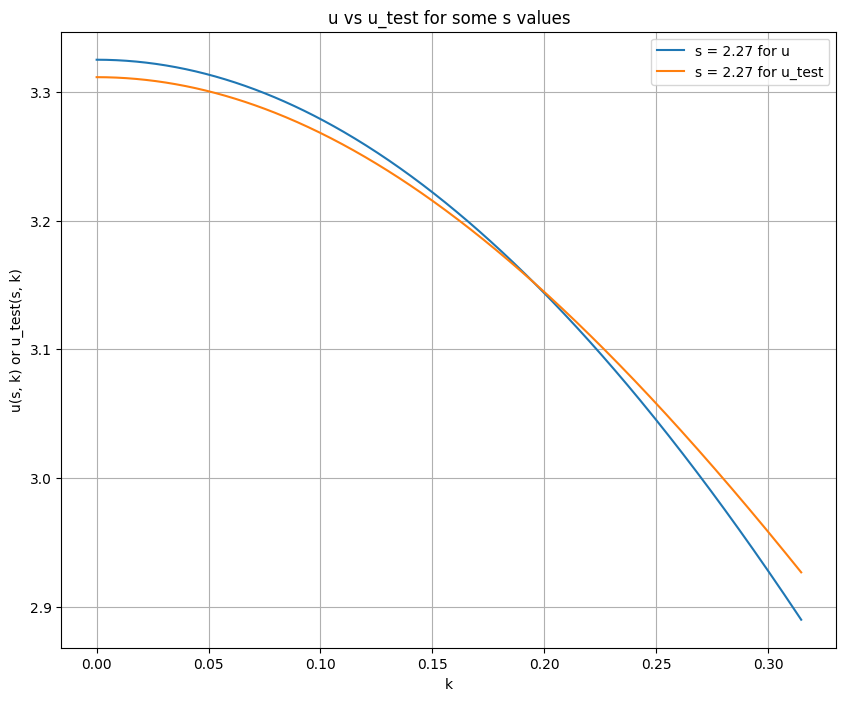

average difference for s = 2.33 : 0.011829106714472033


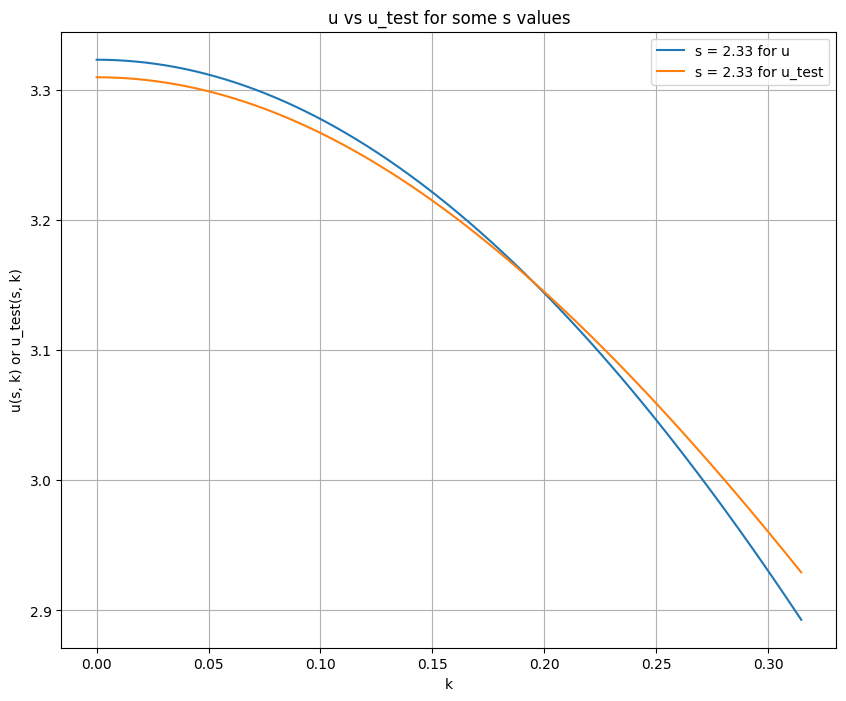

average difference for s = 2.38 : 0.011734684961350848


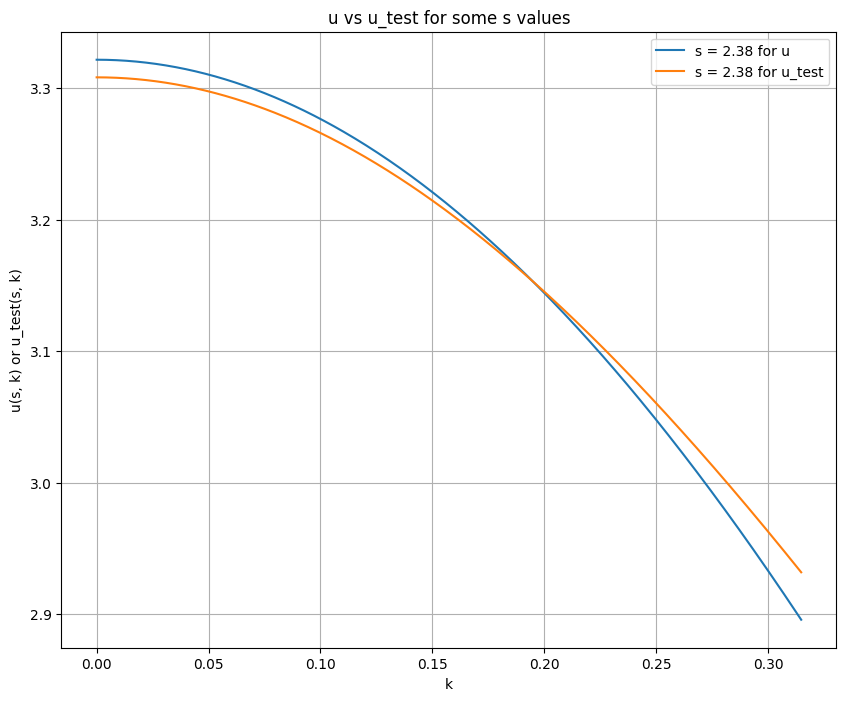

average difference for s = 2.44 : 0.011646150479398253


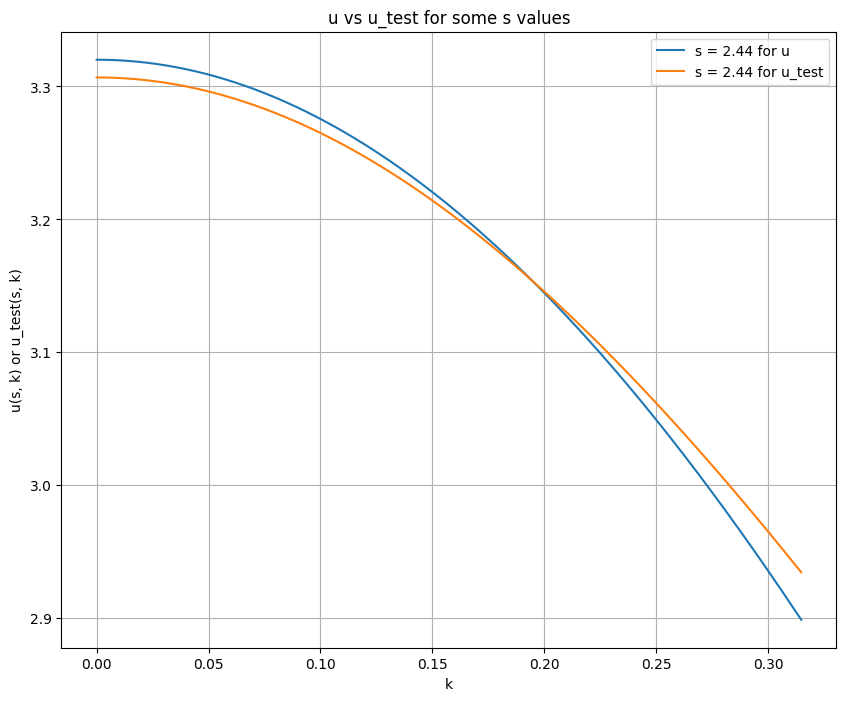

average difference for s = 2.50 : 0.011563131442698733


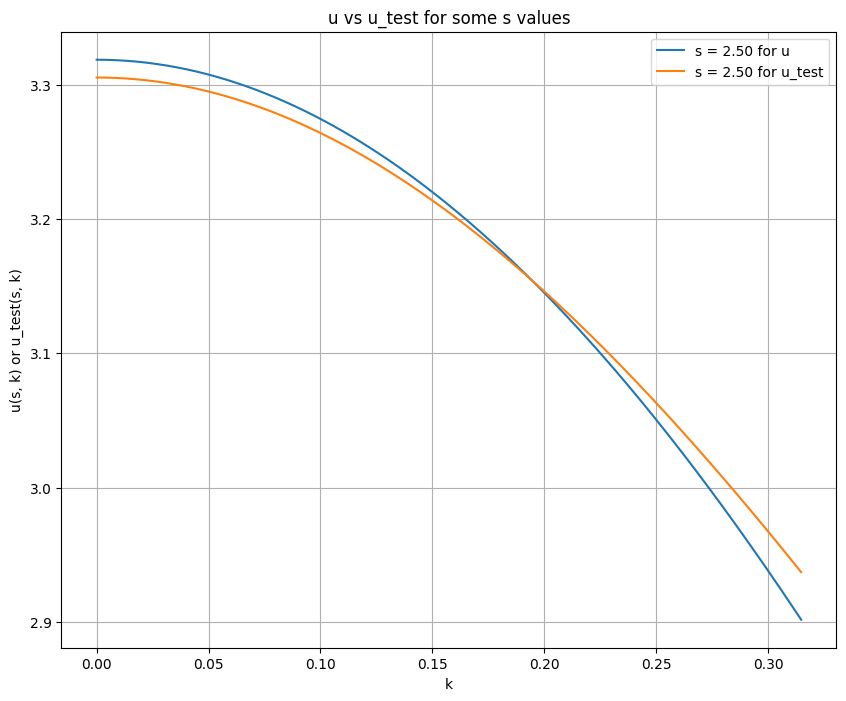

average difference for s = 2.55 : 0.011485396416474137


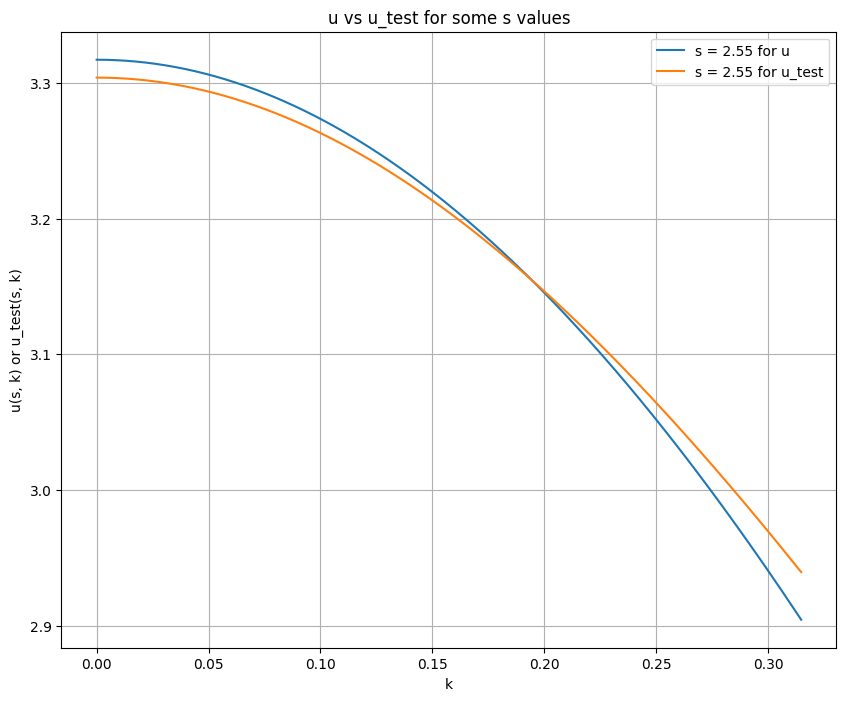

average difference for s = 2.61 : 0.011412504513108379


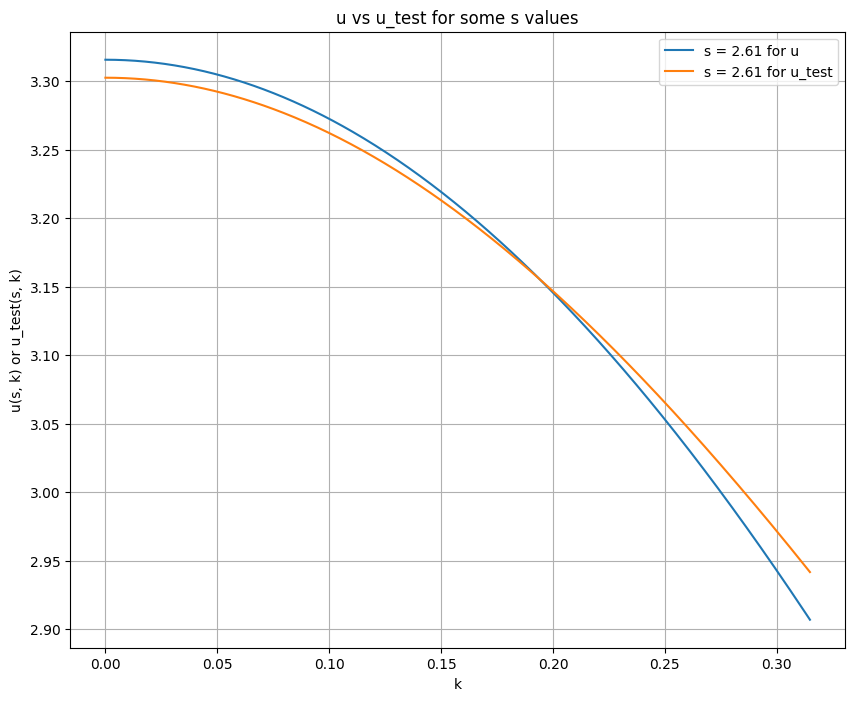

average difference for s = 2.66 : 0.011344145568689075


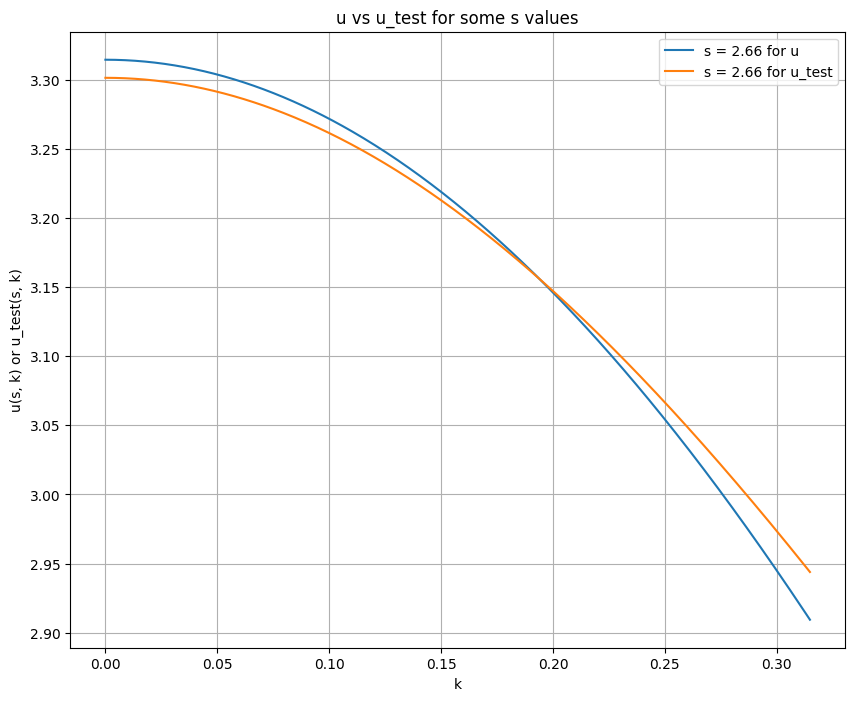

average difference for s = 2.72 : 0.011280075128740151


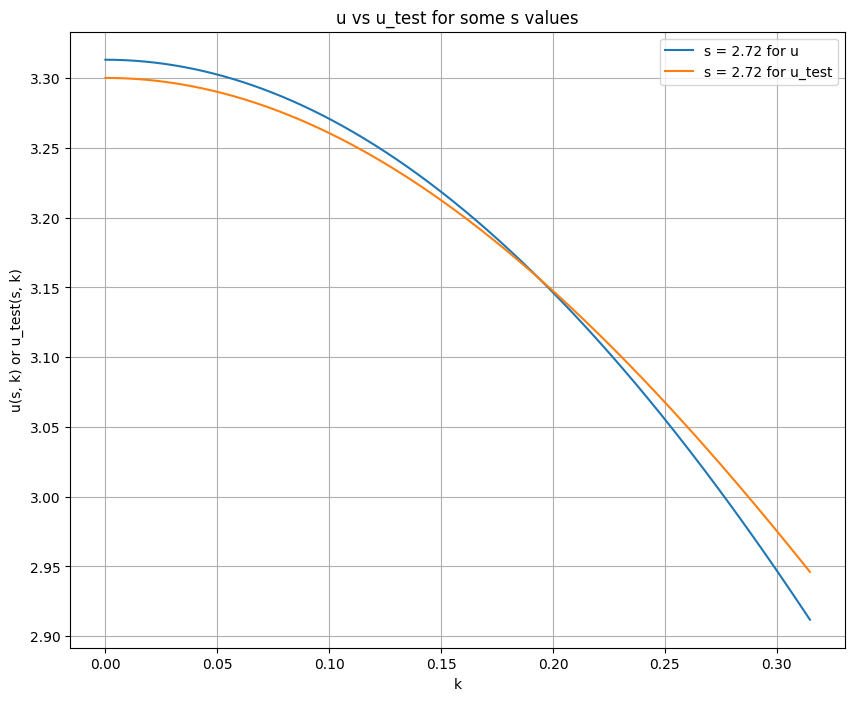

average difference for s = 2.78 : 0.011220063680504417


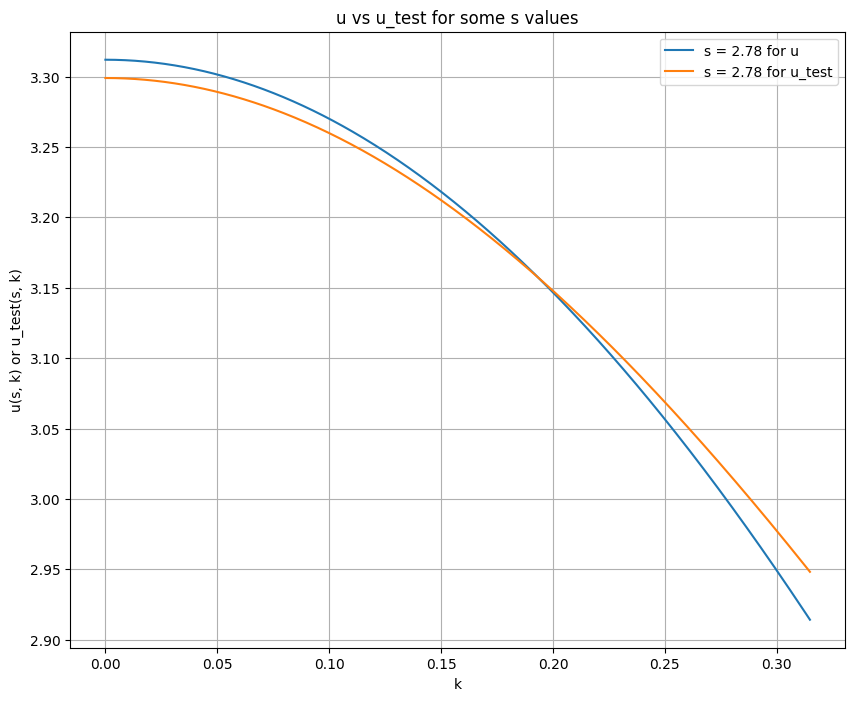

average difference for s = 2.83 : 0.0111637893123213


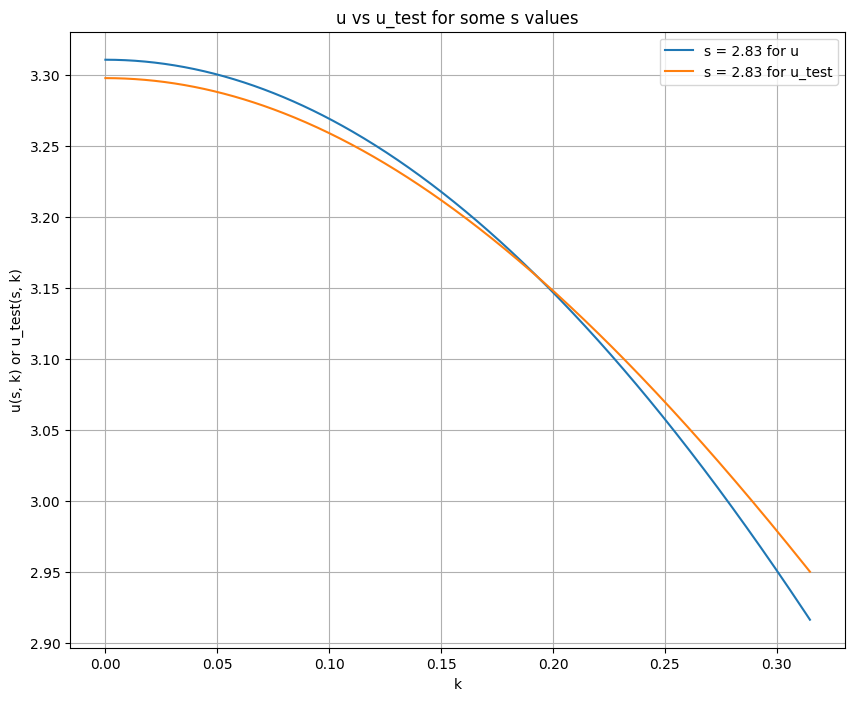

average difference for s = 2.89 : 0.011111023774256615


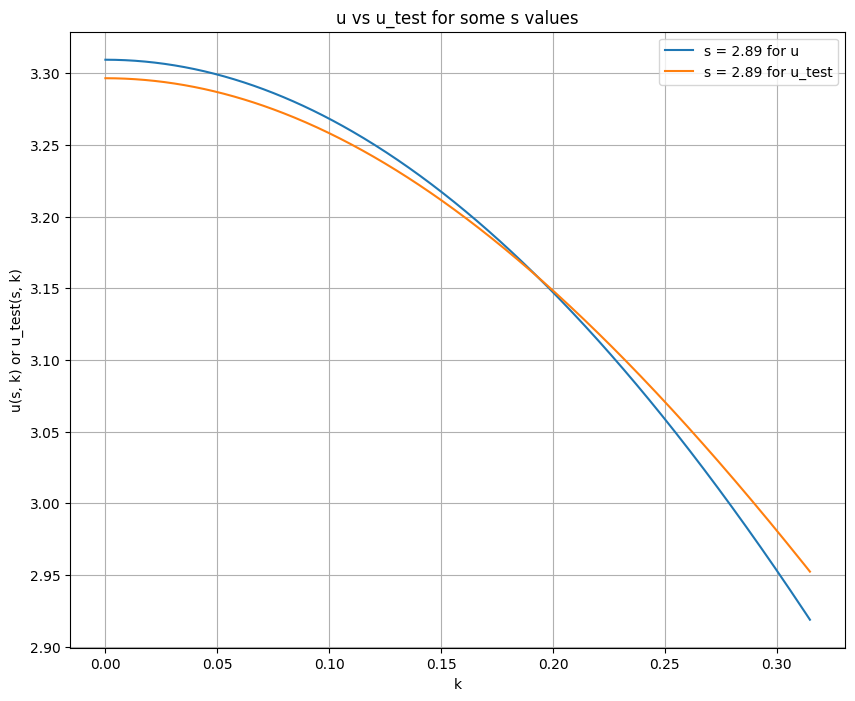

average difference for s = 2.94 : 0.011061608453375818


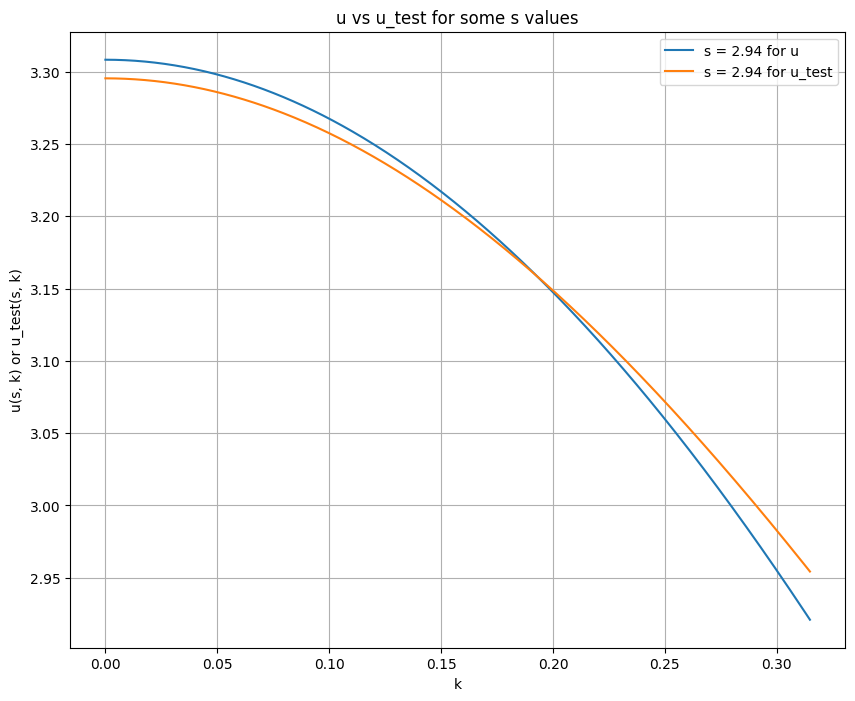

In [86]:
# compare u and u_test

for i in range(0, s_vals.shape[0], s_vals.shape[0]//50):
    if i == 0:
        continue
    plt.figure(figsize=(10, 8))
    plt.title("u vs u_test for some s values")
    plt.xlabel("k")
    plt.ylabel("u(s, k) or u_test(s, k)")
    # plt.ylim(0)
    plt.grid()
    plt.plot(k_vals, u[i, :], label=f"s = {s_vals[i]:.2f} for u")
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f} for u_test")
    print(f"average difference for s = {s_vals[i]:.2f} : {np.mean(np.abs(u[i, :]-u_test[i, :]))}")
    plt.legend()
    plt.show()

# plt.legend()
# plt.show()